MNIST digit dataset classification using a CNN which is trained with a small subset of images

In [1]:
from numpy.random import randint
import numpy as np

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten
from keras.datasets.mnist import load_data
#from keras.datasets.cifar10 import load_data
from keras.layers import Dropout
from keras.optimizers import adam_v2

## Define the function to load dataset

In [2]:
# Get images ready by loading and preprocessing.
def get_images_ready(n_classes=10):
    (trainX, trainy), (_, _) = load_data()
    X = np.expand_dims(trainX, axis=-1)
    X = X.astype('float32')
    X = X/255.  # scale from [0,255] to [0,1]  
    print(X.shape, trainy.shape)
    return [X, trainy]

## Define the function to load a subset of dataset

In [3]:
#Pick a subset of images. 
def select_subset_images(dataset, n_samples=100, n_classes=10):
 	X, y = dataset
 	X_list, y_list = list(), list()
 	n_per_class = int(n_samples / n_classes) #Number of samples per class. 
 	for i in range(n_classes):
         X_with_class = X[y == i] # get all images for this class
         ix = randint(0, len(X_with_class), n_per_class) # choose random images for each class
         [X_list.append(X_with_class[j]) for j in ix] # add to list
         [y_list.append(i) for j in ix]
 	return np.asarray(X_list), np.asarray(y_list) #Returns a list of 2 numpy arrays corresponding to X and Y

(60000, 28, 28, 1) (60000,)


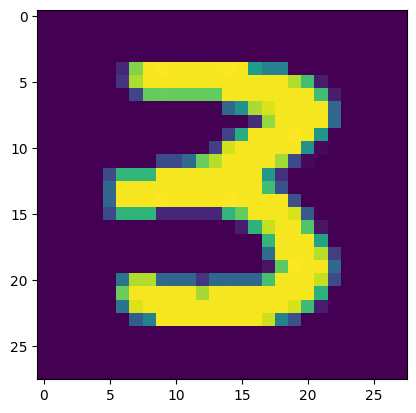

In [4]:
# Define the dataset.
dataset = get_images_ready() 
# The number of samples in the subset you want from the dataset
num_images = 100
# Get subset images and corresponding labels
X, Y = select_subset_images(dataset, num_images)

# View some random images
i = randint(0, X.shape[0])
plt.imshow(X[i])

# Split the subset data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Develop the structure of CNN model

In [6]:
#### NOTE: We will be using sparse_categorical_crossentropy loss so we will not convert Y to categorical ####

#Define Model with BatchNormalization and Dropout
# define cnn model

model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(2,2), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', activation='relu'))

model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
	# compile model
#opt = SGD(lr=0.01, momentum=0.9)
opt = adam_v2.Adam(lr=0.0002, beta_1=0.5)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define model
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 113,162
Trainable params: 113,162
Non-trainable params: 0
__________________________________________________

c:\Users\weiyo\anaconda3\envs\GPUEnv\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


# Train the CNN model

In [7]:
# Train the CNN model
history = model.fit(X_train, y_train, 
                    epochs=10, batch_size=100, 
                    validation_data=(X_test, y_test), 
                    verbose=1)


# Save the trained CNN model
model.save('cnn_model_for_mnist_100epochs.h5')

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 2.3244 - accuracy: 0.0750 - val_loss: 2.3208 - val_accuracy: 0.1000
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 2.3080 - accuracy: 0.0750 - val_loss: 2.3131 - val_accuracy: 0.1000
Epoch 3/10
1/1 [==============================] - 0s 40ms/step - loss: 2.2871 - accuracy: 0.1250 - val_loss: 2.3058 - val_accuracy: 0.1500
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 2.2545 - accuracy: 0.2250 - val_loss: 2.2975 - val_accuracy: 0.1500
Epoch 5/10
1/1 [==============================] - 0s 39ms/step - loss: 2.2283 - accuracy: 0.1875 - val_loss: 2.2906 - val_accuracy: 0.1500
Epoch 6/10
1/1 [==============================] - 0s 37ms/step - loss: 2.2158 - accuracy: 0.2000 - val_loss: 2.2828 - val_accuracy: 0.1500
Epoch 7/10
1/1 [==============================] - 0s 39ms/step - loss: 2.1882 - accuracy: 0.3125 - val_loss: 2.2736 - val_accuracy: 0.2000
Epoch 8/10
1/1 [=============

# Observe the performance of the CNN model (Losses)

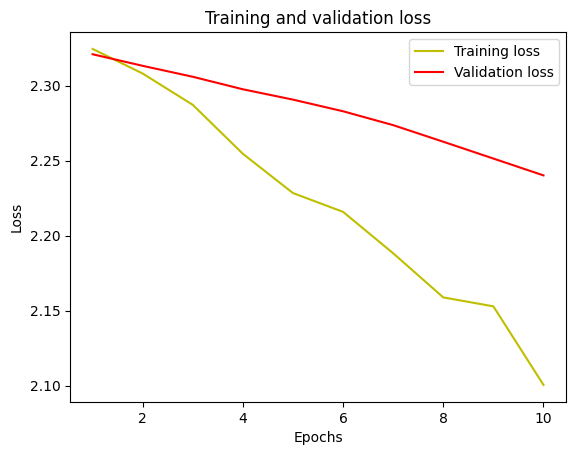

In [8]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Observe the performance of the CNN model (Accuracies)

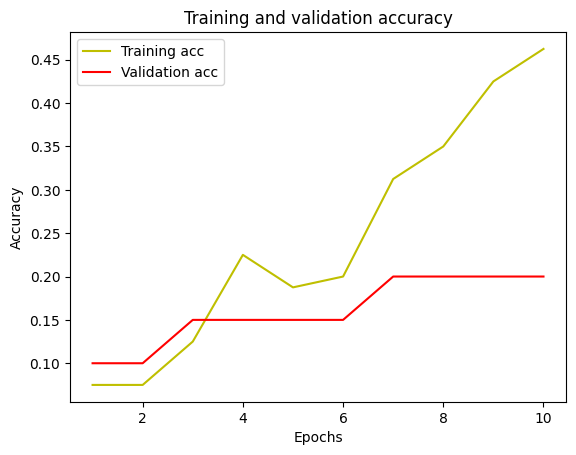

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Deploy the trained CNN model for evaluation

Test Accuracy: 31.310%


<AxesSubplot:>

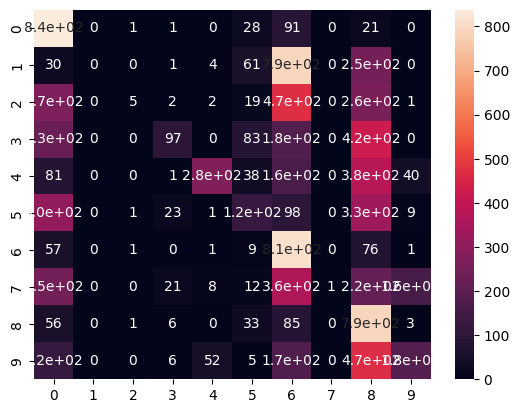

In [10]:
#Test the model on all test data - 10,000 images

from keras.models import load_model
# load the model
my_model = load_model('cnn_model_for_mnist_100epochs.h5')

# load the dataset
(_, _), (test_X, test_y) = load_data()

# expand to 3d, e.g. add channels
test_X = np.expand_dims(test_X, axis=-1)

# convert from ints to floats
test_X = test_X.astype('float32')

# scale from [0,255] to [0,1]
test_X = test_X /255.

# evaluate the model
_, test_acc = my_model.evaluate(test_X, test_y, verbose=0)
print('Test Accuracy: %.3f%%' % (test_acc * 100))


# Predicting the Test set results
y_pred_test = model.predict(test_X)
prediction_test = np.argmax(y_pred_test, axis=1)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_y, prediction_test)
sns.heatmap(cm, annot=True)